# Training a Perceptron via scikit-learn

In [1]:
from sklearn.datasets import load_iris
import numpy as np

In [2]:
iris = load_iris()

In [3]:
X = iris.data[:,[2,3]]
y = iris.target

In [4]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

Many machine learning and optimization algorithms also require feature scaling for optimal performance.

Using the fit method, StandardScaler estimated the parameters µ (sample mean) and σ (standard deviation) for each feature dimension from the training data.

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
from sklearn.linear_model import Perceptron

In [7]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

Having trained a model in scikit-learn, we can make predictions via the predict method.

In [8]:
y_pred = ppn.predict(X_test_std)
print 'Misclassified samples: %d' % (y_test != y_pred).sum()

Misclassified samples: 4


we can calculate the classifcation accuracy of the perceptron on the test set

In [9]:
from sklearn.metrics import accuracy_score
print 'Accuracy: %.2f' % accuracy_score(y_test, y_pred)

Accuracy: 0.91


Finally, plot the decision regions of our newly trained perceptron model and visualize how well it separates the different ﬂower samples.

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generatior and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot all samples
    X_test, y_test = X[test_idx,:], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], y=X[y==cl, 1],
                   alpha=.8, c=cmap(idx), marker=markers[idx], label=cl)
    
    # highligh test samples
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(x=X[:, 0], y=X[:, 1], c='',
                   alpha=1., linewidth=1, marker='o',
                   s=55, label='test set')

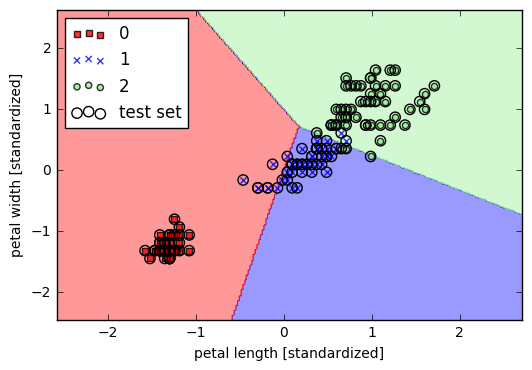

In [12]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Modeling class probabilities via logistic regression

#### Logit Function
$$
logit(p) = log \frac{p}{1-p}
$$
#### Sigmoid Function
$$
\phi(z) = \frac{1}{1+e^{-z}} \\
\text{where,} \\
z = w^t \times x = w_0 + w_1x_1 + ... + w_mx_m
$$

# Learning the weights of the logistic cost function
####  sum-squared-error cost function
$$
J(w) = \Sigma_i \frac{1}{2} \times ( \phi(z^{(i)}) - y^{(i)})^2
$$

# Training a logistic regression model with scikit-learn

In [13]:
from sklearn.linear_model import LogisticRegression

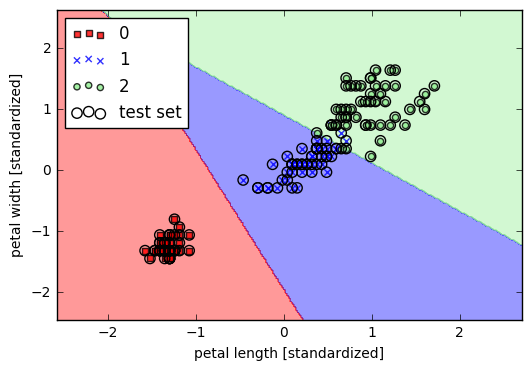

In [14]:
lr = LogisticRegression(C=1000.0, random_state=0)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [15]:
lr.predict_proba(X_test_std[0,:].reshape(1, -1))

array([[  2.05743774e-11,   6.31620264e-02,   9.36837974e-01]])

In [16]:
# Reshape your data either using X.reshape(-1, 1) if your data has a single feature
# or X.reshape(1, -1) if it contains a single sample.
print X_test_std[0,:]
# Single sample
print X_test_std[0,:].reshape(1, -1)
# Sigle feature
print X_test_std[0,:].reshape(-1, 1)

[ 0.70793846  1.50872803]
[[ 0.70793846  1.50872803]]
[[ 0.70793846]
 [ 1.50872803]]


Source for researching:
* http://www.win-vector.com/blog/2011/09/the-simpler-derivation-of-logistic-regression/

In [17]:
np.log(100)

4.6051701859880918

In [18]:
np.exp(4.60517018)

99.999999401190863

In [19]:
b = np.array([1,2,3])
x = np.array([4,5,6])

In [20]:
b.dot(x)

32

In [21]:
np.exp(32)

78962960182680.687

In [22]:
np.prod(np.exp( b*x ))

78962960182680.687

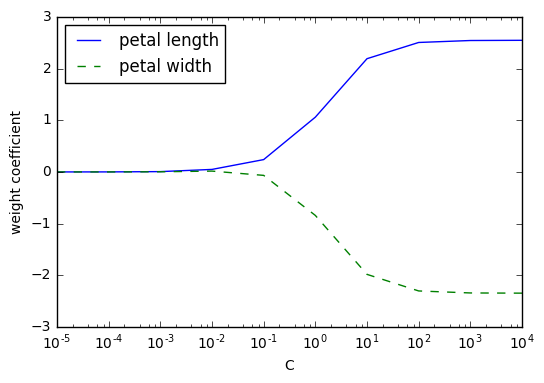

In [23]:
weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label='petal length')
plt.plot(params, weights[:, 1], linestyle='--', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()

# Dealing w/ nonlinearly separable case using slack variables

In [24]:
from sklearn.svm import SVC

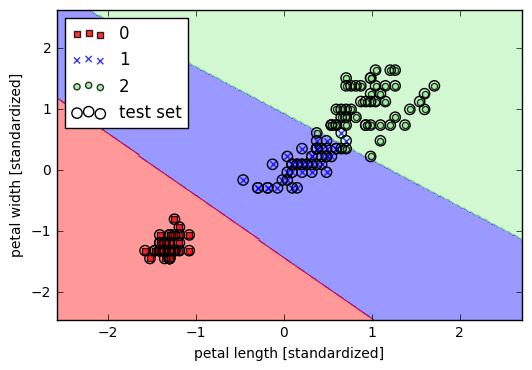

In [25]:
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Solving nonlinear problems using kernel SVM

In [26]:
np.random.seed(0)

In [28]:
X_xor = np.random.randn(200,2)

In [29]:
y_xor = np.logical_xor(X_xor[:,0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

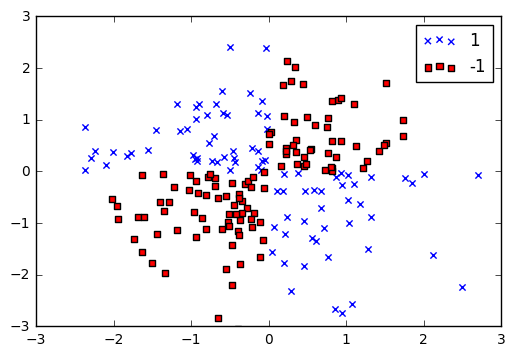

In [32]:
plt.scatter(X_xor[y_xor == 1, 0], X_xor[y_xor==1, 1],
           c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor == -1, 0], X_xor[y_xor == -1, 1],
           c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()

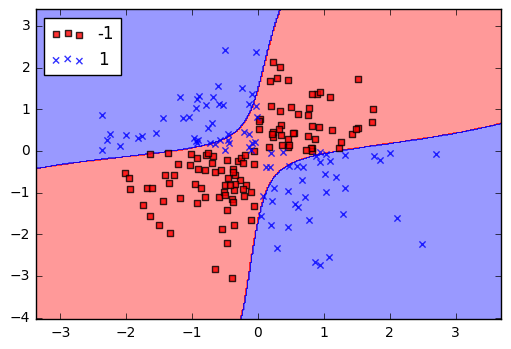

In [33]:
# Radial Basis Function kernel ou Gaussian Kernel
svm = SVC(kernel='rbf', random_state=0, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.show()

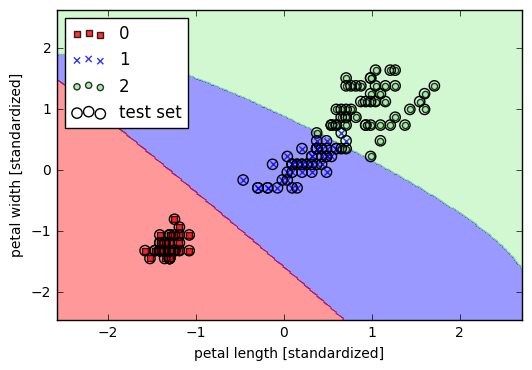

In [34]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

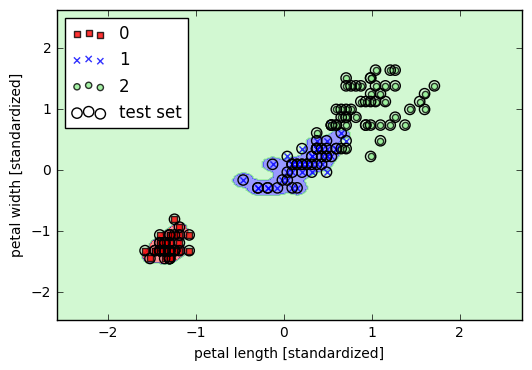

In [35]:
svm = SVC(kernel='rbf', random_state=0, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=svm,
                      test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Decision Trees

In [46]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))
def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))
def error(p):
    return 1 - np.max([p, 1 - p])

In [47]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

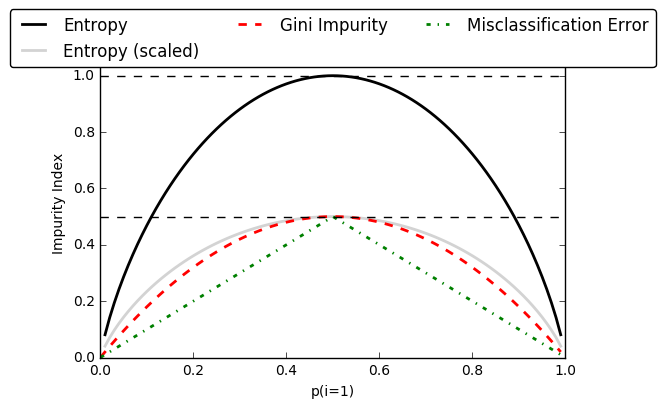

In [48]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err], ['Entropy', 'Entropy (scaled)',
                                                        'Gini Impurity',
                                                        'Misclassification Error'],
                          ['-', '-', '--', '-.'], ['black', 'lightgray',
                                                   'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab,
                   linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
              ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')

# Building Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy',
                              max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

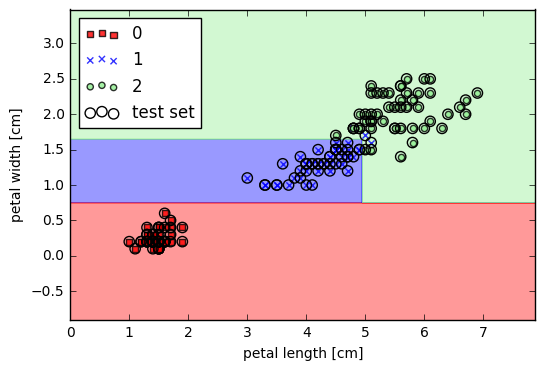

In [50]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined, y_combined,
                      classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')

# Random Forest

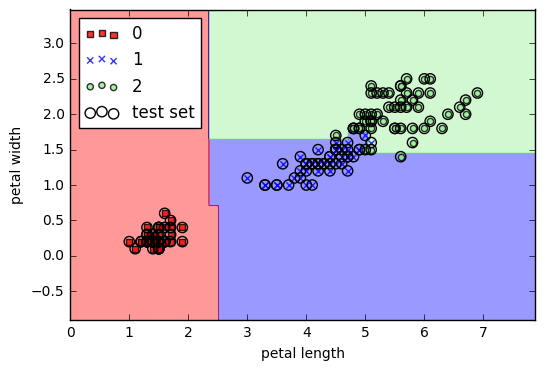

In [58]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=10, random_state=1, n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined, classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

# K-nearest neighbors – a lazy learning algorithm

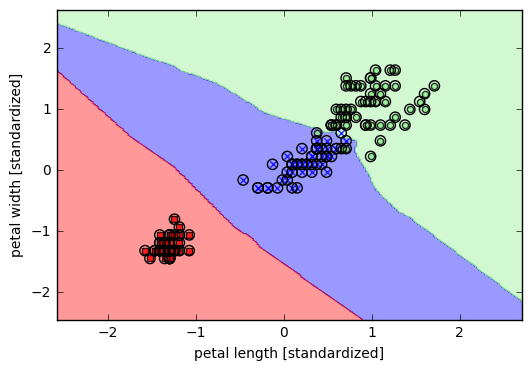

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')